# Converting Categorical Values into Numerical ones
## Topics and Outcomes


When working with machine learning models, especially linear regression or most algorithms, **categorical variables** need to be converted into **numerical** ones because models usually require numeric input to compute distances, apply mathematical transformations, etc.

Here are the common techniques to convert categorical variables into numerical ones, along with examples using `scikit-learn`.

---

## **1. One-Hot Encoding**

**One-hot encoding** creates binary (0 or 1) variables for each category. Each category gets its own column, and the value is 1 if the category is present in that sample, otherwise 0.

### **Example with Scikit-Learn**




In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample dataset with a categorical variable
data = {'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A']}
df = pd.DataFrame(data)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply the encoder to the 'Product' column
encoded_data = encoder.fit_transform(df[['Product']])

# Get the new column names from the encoder
column_names = encoder.get_feature_names_out(['Product'])

# Convert to DataFrame for better visualization
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

print(encoded_df)


   Product_A  Product_B  Product_C
0        1.0        0.0        0.0
1        0.0        1.0        0.0
2        0.0        0.0        1.0
3        1.0        0.0        0.0
4        0.0        1.0        0.0
5        0.0        0.0        1.0
6        1.0        0.0        0.0


**Pros**:
- Simple and effective for categories with no ordinal relationship.
- Widely used in many machine learning models.

**Cons**:
- Can result in high dimensionality when there are many categories (curse of dimensionality).
- Doesn't capture the relationship between categories (e.g., rank or order).

---

## **2. Label Encoding**

**Label encoding** assigns a unique integer to each category. This method is most appropriate when the categorical variables are **ordinal** (i.e., the categories have a meaningful order).

### **Example with Scikit-Learn**

In [30]:
from sklearn.preprocessing import LabelEncoder

# Sample dataset with a categorical variable
data = {'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Large', 'Medium']}
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply the encoder to the 'Size' column
df['Size_Encoded'] = label_encoder.fit_transform(df['Size'])

print(df)

     Size  Size_Encoded
0   Small             2
1  Medium             1
2   Large             0
3  Medium             1
4   Small             2
5   Large             0
6  Medium             1


**Pros**:
- Efficient and simple for ordinal variables where the order is meaningful.
- Doesn’t increase dimensionality.

**Cons**:
- Can mislead models when used on nominal variables (no inherent order), as models might assume a ranking based on the integer labels.

---

## **3. Ordinal Encoding**

**Ordinal encoding** is similar to label encoding but explicitly used when the categories have a natural order (like `Low < Medium < High`).

### **Example with Scikit-Learn**

In [33]:
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset with an ordinal variable
data = {'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD']}
df = pd.DataFrame(data)

# Define the ordering of the categories
education_order = [['High School', 'Bachelor', 'Master', 'PhD']]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=education_order)

# Apply the encoder to the 'Education_Level' column
df['Education_Level_Encoded'] = ordinal_encoder.fit_transform(df[['Education_Level']])

print(df)

  Education_Level  Education_Level_Encoded
0     High School                      0.0
1        Bachelor                      1.0
2          Master                      2.0
3             PhD                      3.0


**Pros**:
- Maintains the order of categories.
- Works well with features that have an inherent ranking (ordinal data).

**Cons**:
- Should not be used for nominal data (no inherent order).
- May introduce assumptions about the relationship between categories that are not accurate.

---

## **4. Target Encoding (Mean Encoding)**

**Target encoding** replaces each category with the mean of the target variable for that category. For example, if you're predicting house prices, and the "city" is a categorical feature, you could replace each city with the average house price in that city.

### **Example (Manual Implementation)**

In [35]:
# Sample dataset with categorical variable and target variable (Sales)
data = {'City': ['CityA', 'CityB', 'CityA', 'CityC', 'CityB', 'CityA'],
        'Sales': [200, 300, 250, 400, 320, 280]}
df = pd.DataFrame(data)

# Calculate the mean target value for each category
city_mean_encoding = df.groupby('City')['Sales'].mean()

# Apply mean encoding to the 'City' column
df['City_Encoded'] = df['City'].map(city_mean_encoding)

print(df)

    City  Sales  City_Encoded
0  CityA    200    243.333333
1  CityB    300    310.000000
2  CityA    250    243.333333
3  CityC    400    400.000000
4  CityB    320    310.000000
5  CityA    280    243.333333


**Pros**:
- Reduces dimensionality, which is beneficial for categorical variables with many unique values.
- Captures the relationship between the categorical variable and the target variable.

**Cons**:
- Can lead to **data leakage** if not done properly, meaning the model might learn from information it wouldn't have during prediction.
- Needs to be used carefully, especially in cross-validation.

---

## **5. Frequency or Count Encoding**

This method replaces each category with the count (or frequency) of its occurrences in the dataset. It’s useful when the distribution of categories might have an impact on the target variable.

### **Example (Manual Implementation)**

In [38]:
# Sample dataset with a categorical variable
data = {'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A']}
df = pd.DataFrame(data)

# Count the occurrences of each category
product_counts = df['Product'].value_counts()

# Apply count encoding to the 'Product' column
df['Product_Encoded'] = df['Product'].map(product_counts)

print(df)

  Product  Product_Encoded
0       A                3
1       B                2
2       C                2
3       A                3
4       B                2
5       C                2
6       A                3


**Pros**:
- Simple to implement.
- Helps capture the impact of category frequency on the target variable.

**Cons**:
- Doesn't capture relationships between categories or their intrinsic properties.
- Might not work well if counts don’t represent a meaningful relationship with the target.

---

## **Comparison and Use Cases**

| **Method**              | **Use Case**                                             | **Advantages**                              | **Disadvantages**                       |
|-------------------------|----------------------------------------------------------|---------------------------------------------|-----------------------------------------|
| **One-Hot Encoding**     | Nominal variables with no inherent order                 | Works well with nominal data                | Increases dimensionality                |
| **Label Encoding**       | Ordinal variables with inherent order                    | Simple to implement                         | Misleading for nominal variables        |
| **Ordinal Encoding**     | Ordinal variables with meaningful ranks                  | Preserves order of categories               | Assumes linear relationship             |
| **Target Encoding**      | Categorical variables where a relationship with target exists | Can capture complex relationships            | Prone to data leakage                  |
| **Frequency/Count Encoding** | High-cardinality categorical variables                  | Reduces dimensionality                      | May not capture category meaning        |

---

### **Conclusion**

Choosing the right encoding method depends on the type of categorical variable (nominal or ordinal), the relationship between the feature and target, and the characteristics of the dataset. 

For example:
- **One-Hot Encoding** works best for variables with no natural order (e.g., Product types).
- **Label or Ordinal Encoding** is useful when there's a clear order (e.g., Education levels).
- **Target Encoding** can be helpful when a category has a strong influence on the target variable, but you need to be careful about overfitting.

----
## Code Example

#### **Step 1: Import Libraries and Open the dataset**

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/apartment_prices.csv")
df

,Square_Area,Num_Rooms,Age_of_Building,Floor_Level,City,Price
0,142,4,14,11,Irbid,59600.0
1,132,4,22,3,Irbid,40600.0
2,54,3,11,17,Amman,55800.0
3,146,2,23,12,Amman,64200.0
4,111,5,1,15,Amman,108450.0
...,...,...,...,...,...,...
495,139,4,29,6,Irbid,38700.0
496,179,2,11,17,Aqaba,83640.0
497,186,1,32,3,Aqaba,38160.0
498,115,3,2,2,Amman,74250.0


#### **Step 2: One-Hot Encoding the Categorical Variable**

To properly include the categorical **'Region'** feature, we need to convert it to a numerical format using **One-Hot Encoding**.

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply the encoder to the 'City' column
encoded_city = encoder.fit_transform(df[['City']])

# Get the new column names for the encoded 'Region' variable
city_encoded_df = pd.DataFrame(encoded_city, columns=encoder.get_feature_names_out(['City']))

# Combine the original dataset with the encoded 'Region' variable
df = pd.concat([df, city_encoded_df], axis=1)

# Drop the original 'Region' column as it's now encoded
df = df.drop('City', axis=1)

# Display the updated DataFrame with one-hot encoded regions
df

,Square_Area,Num_Rooms,Age_of_Building,Floor_Level,Price,City_Amman,City_Aqaba,City_Irbid
0,142,4,14,11,59600.0,0.0,0.0,1.0
1,132,4,22,3,40600.0,0.0,0.0,1.0
2,54,3,11,17,55800.0,1.0,0.0,0.0
3,146,2,23,12,64200.0,1.0,0.0,0.0
4,111,5,1,15,108450.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
495,139,4,29,6,38700.0,0.0,0.0,1.0
496,179,2,11,17,83640.0,0.0,1.0,0.0
497,186,1,32,3,38160.0,0.0,1.0,0.0
498,115,3,2,2,74250.0,1.0,0.0,0.0


#### **Step 3: Define Features and Target Including the Encoded Variables**

Now, the dataset includes the **one-hot encoded** region columns along with the original advertising spend features. We will include these encoded columns in our feature set for the model.

In [46]:
# Features and Target
X = df[['Square_Area', 'Num_Rooms', 'Age_of_Building','Floor_Level','City_Amman','City_Irbid','City_Aqaba']]  # Independent variables
y = df['Price']  # Dependent variable (Sales)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 4: Train the Model**

We can now train the model using the expanded feature set, which includes both numerical and the one-hot encoded categorical variables.

In [48]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  373.65078219  6263.97916489 -1238.05453701  1234.53893565
 10815.35047434 -9289.13955028 -1526.21092405]
Intercept: -528.1602362899066


#### **Step 5: Make Predictions and Evaluate the Model**

Evaluate the model's performance using the test set.

In [50]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the model using MSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,2))
print("Mean Absolute Error (MAE):", round(mae,2))
print("R-squared (R²):", round(r2,2))

Mean Squared Error (MSE): 17097091.97
Mean Absolute Error (MAE): 2968.48
R-squared (R²): 0.97


#### **Step 6: Visualizing Performance**

Finally, we can plot the actual vs predicted values to visualize the model's accuracy.

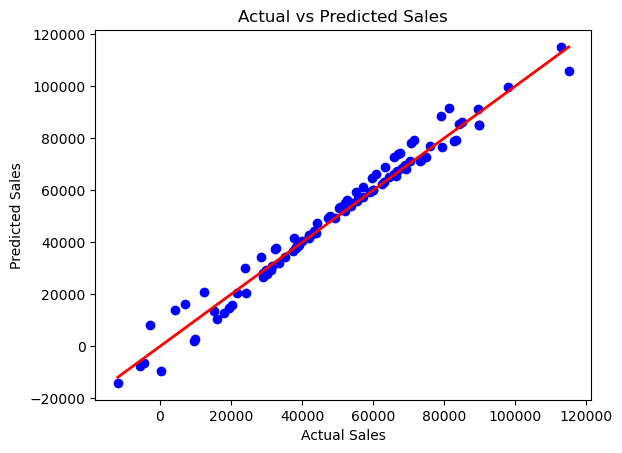

In [52]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

---

### **Impact of Including the Categorical Variable**

The inclusion of the **Region** variable can improve the model’s performance, as sales might differ depending on the geographical location. By **one-hot encoding** the region, we allow the model to account for differences in sales patterns across regions.

#### **Summary**

- We added a **categorical variable** ("Region") to represent different geographical areas.
- We used **One-Hot Encoding** to convert the categorical variable into a numerical format that the linear regression model can handle.
- The expanded feature set now includes advertising spend and the encoded region, allowing the model to capture regional variations in sales.

By including this additional categorical feature, the model has the potential to **improve accuracy** since regional differences might play an important role in influencing sales.